# 一、K 均值聚类

## 1. K-means聚类简单分析

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

'''
k均值聚类实现(from scratch)
输入：data_orig--聚类特征数据集，要求为数据结构要求为numpy数值数组
输入：knum--聚类个数
输入：是否有标签（data最后一列），需去掉标签列
输出：data后面加一列聚类分析结果，显示类别，返回聚类结果和聚类中心
'''
def K_mean(data_orig,knum,hasLabel):
    data = data_orig
    if(hasLabel==True):
        data = np.delete(data,data.shape[1]-1,1)
    '''聚类数据(features)维度'''
    p=len(data[0,:])
    '''初始聚类中心(p列 - 特征)'''
    cluscenter=np.zeros((knum,p))
    '''旧聚类中心'''
    lastcluscenter=np.zeros((knum,p))
    '''初始聚类中心和旧聚类中心初始化，取数据的前knum行作为初始值'''
    for i in range(knum):
      cluscenter[i,:]=data[i,:]
      lastcluscenter[i,:]=data[i,:]
    
    '''预定义聚类簇一维数组，用于存放每次计算样本的所属cluster'''
    clusindex=np.zeros((len(data)))
    clusterChanged = True
    '''开始迭代'''
    while clusterChanged:
        for i in range(len(data)):
              '''计算第i个样本到各个聚类中心的欧式距离
              预定义sumsquare，用于存放第i个样本到各个聚类中心的欧式距离'''
              sumsquare=np.zeros((knum))
              for k in range(knum):
                  sumsquare[k]=sum((data[i,:]-cluscenter[k,:])**2)
              sumsquare=np.sqrt(sumsquare)
              '''第i个样本到各个聚类中心的欧式距离进行升序排序'''
              s=pd.Series(sumsquare).sort_values()
              '''判断第i个样本的cluster归属（距离最小，即s序列中第0个位置的index）'''
              clusindex[i]=s.index[0]
        '''将聚类结果添加到聚类数据最后一列
        hstack: 水平(按列顺序)把数组给堆叠起来'''
        clusdata=np.hstack((data,clusindex.reshape((len(data),1))))
        '''更新聚类中心，新的聚类中心为对应类别样本特征的均值(axis=0,计算每一列均值)'''
        for i in range(knum):
              cluscenter[i,:]=np.mean(clusdata[clusdata[:,p]==i,:-1],0).reshape(1,p)
        '''新的聚类中心与旧的聚类中心相减，矩阵相减(knum,p)'''
        t=abs(lastcluscenter-cluscenter)
        '''如果新的聚类中心与旧的聚类中心一致，即聚类中心不发生变化,退出循环;
        如果更新的聚类中心与旧的聚类中心不一致，将更新的聚类中心赋给旧的聚类中心，
        进入下一次循环'''
        if sum(sum(t))==0: 
            clusterChanged = False
        else:
            for k in range(knum):
                lastcluscenter[k,:]=cluscenter[k,:]  

    return cluscenter,clusdata

In [2]:
'''简单例子，二维数据聚类分析'''
np.random.seed(123)
data_set=np.random.randn(100,2)
data_set[:10,:]

array([[-1.0856306 ,  0.99734545],
       [ 0.2829785 , -1.50629471],
       [-0.57860025,  1.65143654],
       [-2.42667924, -0.42891263],
       [ 1.26593626, -0.8667404 ],
       [-0.67888615, -0.09470897],
       [ 1.49138963, -0.638902  ],
       [-0.44398196, -0.43435128],
       [ 2.20593008,  2.18678609],
       [ 1.0040539 ,  0.3861864 ]])

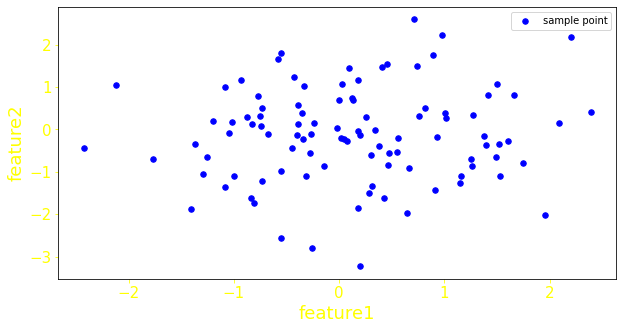

In [3]:
'''绘制样本点散点图'''
point_x = data_set[:,0]
point_y = data_set[:,1]        
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(point_x, point_y, s=30, c="b", marker="o", label="sample point")
ax.legend()
ax.set_xlabel("feature1",color='yellow',size=18)
ax.set_ylabel("feature2",color='yellow',size=18)
ax.tick_params('both',colors='yellow',labelsize=15,labelcolor='yellow')

In [4]:
'''k均值聚类分析,得到收敛后的cluster中心和簇分配矩阵'''
my_centroids,my_cluster = K_mean(data_set, 4, False)
print('Cluster center:')
print(my_centroids)
print('Clustering results')
print(my_cluster[:,-1])

Cluster center:
[[-0.45624485  0.34307996]
 [ 0.97430305 -0.86593514]
 [ 1.08261132  1.10552466]
 [-0.82627895 -1.47448575]]
Clustering results
[0. 1. 0. 3. 1. 0. 1. 0. 2. 2. 2. 0. 3. 1. 3. 3. 3. 1. 0. 0. 3. 0. 0. 2.
 2. 3. 1. 0. 2. 2. 0. 1. 2. 0. 0. 1. 1. 0. 0. 3. 1. 2. 3. 3. 2. 1. 2. 0.
 3. 1. 1. 2. 0. 3. 1. 0. 0. 2. 0. 1. 0. 0. 1. 2. 1. 3. 0. 2. 0. 1. 0. 2.
 1. 2. 0. 0. 3. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 2. 1. 0. 2. 1. 3. 3. 0. 0.
 0. 3. 0. 0.]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


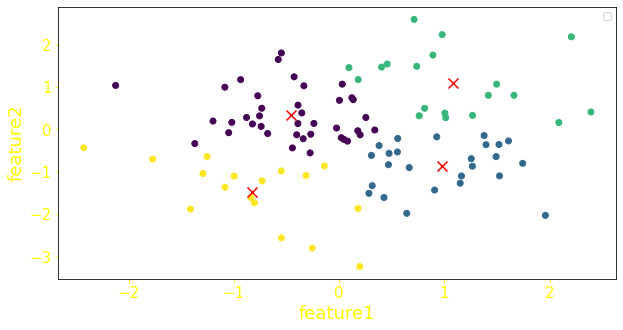

In [5]:
'''绘图库绘制散点图，其中，四个质心用红色x标出'''
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(my_cluster[:,0], my_cluster[:, 1], c=my_cluster[:, -1])
ax.scatter(my_centroids[:, 0], my_centroids[:, 1], color='red',marker='x',s=100);
ax.legend()
ax.set_xlabel("feature1",color='yellow',size=18)
ax.set_ylabel("feature2",color='yellow',size=18)
ax.tick_params('both',colors='yellow',labelsize=15,labelcolor='yellow')

## 2. 鸢尾花数据集K-means聚类

In [6]:
'''数据集说明：第一到第四列，花瓣的长度和宽度，花萼的宽度和长度
三种花iris-virgincal, iris-setosa,iris-versicolor
共150个样本'''
iris = pd.read_csv('iris.txt',header = None)
iris.tail(70)

,0,1,2,3,4
80,5.5,2.4,3.8,1.1,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
83,6.0,2.7,5.1,1.6,Iris-versicolor
84,5.4,3.0,4.5,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
iris_data = np.array(iris)

iris_cent,iris_result = K_mean(iris_data,3,True)
'''聚类结果和原始数据中的标签放一起比较'''
res = pd.concat([pd.DataFrame(iris_result),pd.DataFrame(iris_data[:,-1])],axis=1)
res

,0,1,2,3,4,0
0,5.1,3.5,1.4,0.2,2.0,Iris-setosa
1,4.9,3.0,1.4,0.2,2.0,Iris-setosa
2,4.7,3.2,1.3,0.2,2.0,Iris-setosa
3,4.6,3.1,1.5,0.2,2.0,Iris-setosa
4,5.0,3.6,1.4,0.2,2.0,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,Iris-virginica
146,6.3,2.5,5.0,1.9,1.0,Iris-virginica
147,6.5,3.0,5.2,2.0,0.0,Iris-virginica
148,6.2,3.4,5.4,2.3,0.0,Iris-virginica


## 3. 农村居民人均可支配收入K-means聚类分析

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False

data=pd.read_excel('农村居民人均可支配收入来源2016.xlsx')
'''去掉地区，根据四个features进行聚类分析
工资性收入,经营净收入,财产净收入,转移净收入'''
X=data.iloc[:,1:]
X

,工资收入,经营净收入,财产净收入,转移净收入
0,16637.5,2061.9,1350.1,2260.0
1,12048.1,5309.4,893.7,1824.4
2,6263.2,3970.0,257.5,1428.6
3,5204.4,2729.9,149.0,1999.1
4,2448.9,6215.7,452.6,2491.7
5,5071.2,5635.5,257.6,1916.4
6,2363.1,7558.9,231.8,1969.1
7,2430.5,6425.9,572.7,2402.6
8,18947.9,1387.9,859.6,4325.0
9,8731.7,5283.1,606.0,2984.8


In [9]:
'''基于原始数据聚类，
指定4个cluster，random_state控制随机状态，最多500次迭代'''
model = KMeans(n_clusters = 4, random_state=0, max_iter = 500) 
model.fit(X) 
c=model.labels_
Fs=pd.concat([data['地区'],pd.DataFrame(c)],axis=1)
Fs.columns=["地区","cluster"]
Fs=Fs.sort_values(by="cluster",ascending=True)
Fs

,地区,cluster
1,天津,0
10,浙江,0
15,河南,1
28,青海,1
27,甘肃,1
26,陕西,1
25,西藏,1
24,云南,1
23,贵州,1
22,四川,1


In [10]:
'''对scale后的数据进行聚类, scale matters！'''
scaler = StandardScaler()
'''归一化'''
X.iloc[:,[0,1,2,3]]=scaler.fit_transform(X) 
 
'''指定4个cluster，random_state控制随机状态，最多500次迭代'''
model = KMeans(n_clusters = 4, random_state=0, max_iter = 500) 
model.fit(X)
#cluster_assgn = model.predict(X)
#cluster_assgn
c=model.labels_
Fs=pd.concat([data['地区'],pd.DataFrame(c)],axis=1)
Fs.columns=["地区","cluster"]
Fs=Fs.sort_values(by="cluster",ascending=True)
Fs

,地区,cluster
30,新疆,0
24,云南,0
14,山东,0
25,西藏,0
12,福建,0
7,黑龙江,0
20,海南,0
5,辽宁,0
4,内蒙古,0
2,河北,0


In [11]:
'''簇中心'''
kmeans_cc = model.cluster_centers_
print('簇中心：',kmeans_cc)
'''簇标签'''
kmeans_labels = model.labels_
print('簇标签：',kmeans_labels)
print('簇包含样本个数',pd.Series(kmeans_labels).value_counts())

簇中心： [[-0.4112915   0.84123017 -0.21997107 -0.72010329]
 [ 1.4367086   0.59122318  1.38155812  0.16521737]
 [-0.3721276  -0.44736933 -0.48435591  0.28091289]
 [ 2.89799735 -2.15833071  2.77017304  1.60589541]]
簇标签： [3 1 0 2 0 0 0 0 3 1 1 2 0 2 0 2 2 2 2 2 0 2 2 2 0 0 2 2 2 2 0]
簇包含样本个数 2    15
0    11
1     3
3     2
dtype: int64


In [12]:
cluster_center = pd.DataFrame(kmeans_cc, columns=X.columns)
print(cluster_center)
cluster_center.index = pd.DataFrame(kmeans_labels).drop_duplicates().iloc[:,0]
print(cluster_center)

       工资收入     经营净收入     财产净收入     转移净收入
0 -0.411292  0.841230 -0.219971 -0.720103
1  1.436709  0.591223  1.381558  0.165217
2 -0.372128 -0.447369 -0.484356  0.280913
3  2.897997 -2.158331  2.770173  1.605895
       工资收入     经营净收入     财产净收入     转移净收入
0                                        
3 -0.411292  0.841230 -0.219971 -0.720103
1  1.436709  0.591223  1.381558  0.165217
0 -0.372128 -0.447369 -0.484356  0.280913
2  2.897997 -2.158331  2.770173  1.605895


In [13]:
labels = X.columns
legen = ['地区经济簇' + str(i + 1) for i in cluster_center.index]
print(legen)
lstype = ['-', '--', ':', '-.']#(0, (3, 5, 1, 5, 1, 5)),
print(lstype)
kinds = list(cluster_center.iloc[:,0])
print(kinds)
cluster_center = pd.concat([cluster_center, cluster_center.loc[:,'工资收入']], axis=1)
print(cluster_center)
centers = np.array(cluster_center.iloc[:, 0:])
print(centers)

['地区经济簇4', '地区经济簇2', '地区经济簇1', '地区经济簇3']
['-', '--', ':', '-.']
[-0.4112915013206333, 1.436708597389172, -0.3721275990899407, 2.8979973543542767]
       工资收入     经营净收入     财产净收入     转移净收入      工资收入
0                                                  
3 -0.411292  0.841230 -0.219971 -0.720103 -0.411292
1  1.436709  0.591223  1.381558  0.165217  1.436709
0 -0.372128 -0.447369 -0.484356  0.280913 -0.372128
2  2.897997 -2.158331  2.770173  1.605895  2.897997
[[-0.4112915   0.84123017 -0.21997107 -0.72010329 -0.4112915 ]
 [ 1.4367086   0.59122318  1.38155812  0.16521737  1.4367086 ]
 [-0.3721276  -0.44736933 -0.48435591  0.28091289 -0.3721276 ]
 [ 2.89799735 -2.15833071  2.77017304  1.60589541  2.89799735]]


In [14]:
'''分割圆周长，并让其闭合'''
n = len(labels)
angle = np.linspace(0, 2 * np.pi, n, endpoint=False)
print(angle)
angle = np.concatenate((angle, [angle[0]]))
print(angle)

[0.         1.57079633 3.14159265 4.71238898]
[0.         1.57079633 3.14159265 4.71238898 0.        ]


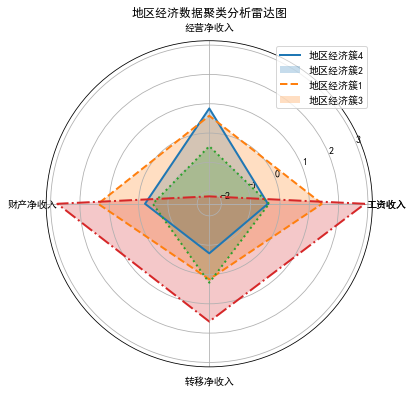

In [15]:
'''聚类分析 蜘蛛图'''
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)

'''画线'''
for i in range(len(kinds)):
    ax.plot(angle, centers[i], linestyle=lstype[i], linewidth=2, label=kinds[i])
    ax.fill(angle, centers[i],alpha=0.25)

ax.set_thetagrids(angle * 180 / np.pi, cluster_center.columns)
plt.title('地区经济数据聚类分析雷达图')
plt.legend(legen)
plt.show()
plt.close()

# 二、层次聚类算法

## 1. 层次聚类简单例子

In [16]:
import scipy
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt

np.random.seed(4)
x = np.random.randn(10,2)
x

array([[ 0.05056171,  0.49995133],
       [-0.99590893,  0.69359851],
       [-0.41830152, -1.58457724],
       [-0.64770677,  0.59857517],
       [ 0.33225003, -1.14747663],
       [ 0.61866969, -0.08798693],
       [ 0.4250724 ,  0.33225315],
       [-1.15681626,  0.35099715],
       [-0.60688728,  1.54697933],
       [ 0.72334161,  0.04613557]])

In [17]:
'''计算点与点之间距离，默认欧氏距离法'''
d = sch.distance.pdist(x)
#len(d) #上三角距离矩阵
d

array([1.06423683, 2.13660761, 0.70519893, 1.67133695, 0.81756839,
       0.41034247, 1.21653151, 1.23632795, 0.81153037, 2.3502585 ,
       0.36093515, 2.27014623, 1.79380599, 1.46620544, 0.37850609,
       0.93786815, 1.83712566, 2.19517225, 0.86855315, 1.82073936,
       2.0941629 , 2.0716786 , 3.13722985, 1.99062133, 2.00225179,
       1.4405127 , 1.10534273, 0.56611602, 0.94928219, 1.47816209,
       1.09752205, 1.48263826, 2.11252032, 2.85343159, 1.25605044,
       0.46268956, 1.8289498 , 2.04330726, 0.17013246, 1.5819997 ,
       1.59389475, 0.41331319, 1.31635681, 1.90471368, 2.00550266])

In [18]:
'''进行层次聚类:计算cluster与cluster之间的距离
返回(n-1)*4的矩阵 - 需进行9次聚类
前两列是进行cluster操作的向量的索引值，第三列是cluster之间的距离，第四列表示目前cluster数目'''
z=sch.linkage(d,method='single') #ward离差平方和,average,single，及其他
z

array([[ 5.        ,  9.        ,  0.17013246,  2.        ],
       [ 1.        ,  3.        ,  0.36093515,  2.        ],
       [ 7.        , 11.        ,  0.37850609,  3.        ],
       [ 0.        ,  6.        ,  0.41034247,  2.        ],
       [10.        , 13.        ,  0.41331319,  4.        ],
       [12.        , 14.        ,  0.70519893,  7.        ],
       [ 2.        ,  4.        ,  0.86855315,  2.        ],
       [ 8.        , 15.        ,  0.93786815,  8.        ],
       [16.        , 17.        ,  1.09752205, 10.        ]])

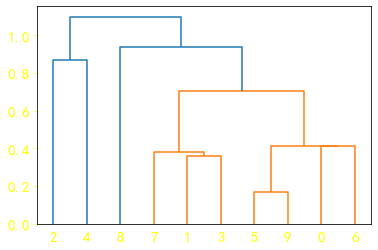

In [19]:
'''层次聚类树'''
p = sch.dendrogram(z)
plt.tick_params('both',colors='yellow',labelsize=15,labelcolor='yellow')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt

'''使用AgglomerativeClustering进行自下而上层次聚类,n_clusters=2,affinity =’euclidean’'''
hierclus_model = AgglomerativeClustering(linkage='single')
cluster_res = hierclus_model.fit(x)
xlabs = cluster_res.labels_
xlabs

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

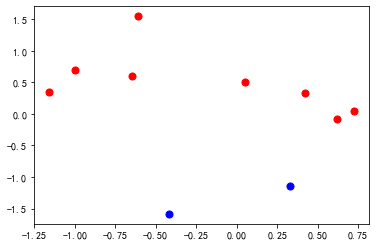

In [21]:
plt.scatter(x[xlabs==0,0],x[xlabs==0,1],s=50,marker='o',color='red')
plt.scatter(x[xlabs==1,0],x[xlabs==1,1],s=50,marker='o',color='blue')

## 2. 地区经济数据层次聚类分析
 

In [22]:
import pandas as pd 
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False

YXdata=pd.read_excel('经济数据.xlsx',index_col=0)
YXdata

,生产总值,从业人员,固定资产,利用外资,进出口额,新品出口,市场占有,对外依存
地区,,,,,,,,
北京,162.5193,1069.7000,55.7893,196.906,3894.9,6470.514,2.6347,1.5479
天津,113.0728,763.1600,70.6767,61.947,1033.9,7490.317,1.9862,0.5906
河北,245.1576,3962.4200,163.8933,178.782,536.0,2288.188,1.2756,0.1412
山西,112.3755,1738.9000,70.7306,104.945,147.6,1522.788,0.2424,0.0848
内蒙古,143.5988,1249.3000,103.6517,54.426,119.4,342.358,0.2093,0.0537
辽宁,222.2670,2364.9000,177.2629,155.296,959.6,4150.239,2.2781,0.2788
吉林,105.6883,1337.8000,74.4171,58.843,220.5,746.941,0.2232,0.1348
黑龙江,125.8200,1977.8000,74.7538,81.979,385.1,318.892,0.7887,0.1977
上海,191.9569,1104.3300,49.6207,179.582,4373.1,10326.436,9.3591,1.4714


In [23]:
YXdata.columns=['Y','X1','X2','X3','X4','X5','X6','X7']
'''取变量X1和X2(生产总值，从业人员)前11个数据'''
X12=YXdata[['X1','X2']][:11]
X12

,X1,X2
地区,,
北京,1069.70,55.7893
天津,763.16,70.6767
河北,3962.42,163.8933
山西,1738.90,70.7306
内蒙古,1249.30,103.6517
辽宁,2364.90,177.2629
吉林,1337.80,74.4171
黑龙江,1977.80,74.7538
上海,1104.33,49.6207


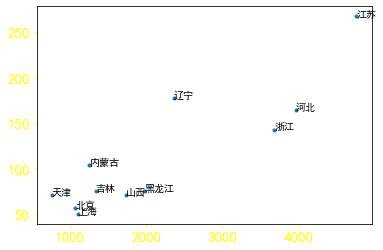

In [24]:
plt.plot(X12.X1,X12.X2,'.')
for i in range(11):
    plt.text(X12.X1[i],X12.X2[i],X12.index[i])
plt.tick_params('both',colors='yellow',labelsize=15,labelcolor='yellow')

In [25]:
'''数据标准化'''
Z12=(X12-X12.mean())/X12.std()
Z12
#from sklearn.preprocessing import StandardScaler  
#scaler = StandardScaler() 
#scaler.fit(X12)
#Z12 = scaler.transform(X12)

,X1,X2
地区,,
北京,-0.822167,-0.860339
天津,-1.048665,-0.638776
河北,1.315221,0.748528
山西,-0.327705,-0.637974
内蒙古,-0.689463,-0.148023
辽宁,0.134837,0.947503
吉林,-0.624072,-0.583109
黑龙江,-0.151185,-0.578098
上海,-0.796580,-0.952144


In [26]:
'''加载系统聚类包'''
import scipy.cluster.hierarchy as sch
'''样品间距离,长度为n*(n-1)/2的距离列表，上三角'''
D12=sch.distance.pdist(Z12)
D12
np.round(D12,3)
'''距离矩阵，对称'''
dist_mat = sch.distance.squareform(D12)
dist_mat
Y12=pd.DataFrame(dist_mat,index=X12.index,columns=X12.index.values)
'''输出距离阵'''
round(Y12,3)

,北京,天津,河北,山西,内蒙古,辽宁,吉林,黑龙江,上海,江苏,浙江
地区,,,,,,,,,,,
北京,0.000,0.317,2.675,0.542,0.725,2.046,0.341,0.728,0.095,4.160,2.315
天津,0.317,0.000,2.741,0.721,0.608,1.979,0.428,0.900,0.402,4.153,2.401
河北,2.675,2.741,0.000,2.150,2.196,1.197,2.352,1.977,2.711,1.642,0.389
山西,0.542,0.721,2.150,0.000,0.609,1.652,0.301,0.186,0.564,3.675,1.783
内蒙古,0.725,0.608,2.196,0.609,0.000,1.371,0.440,0.689,0.811,3.553,1.884
辽宁,2.046,1.979,1.197,1.652,1.371,0.000,1.708,1.552,2.116,2.215,1.105
吉林,0.341,0.428,2.352,0.301,0.440,1.708,0.000,0.473,0.407,3.820,2.001
黑龙江,0.728,0.900,1.977,0.186,0.689,1.552,0.473,0.000,0.746,3.521,1.606
上海,0.095,0.402,2.711,0.564,0.811,2.116,0.407,0.746,0.000,4.213,2.346


In [27]:
"""聚类分析，默认方法='complete'"""
H1=sch.linkage(D12)
H1

array([[ 0.        ,  8.        ,  0.09530393,  2.        ],
       [ 3.        ,  7.        ,  0.18639825,  2.        ],
       [ 6.        , 12.        ,  0.30140255,  3.        ],
       [ 1.        , 11.        ,  0.31684622,  3.        ],
       [13.        , 14.        ,  0.34073179,  6.        ],
       [ 2.        , 10.        ,  0.38877071,  2.        ],
       [ 4.        , 15.        ,  0.43997321,  7.        ],
       [ 5.        , 16.        ,  1.10541379,  3.        ],
       [17.        , 18.        ,  1.37100242, 10.        ],
       [ 9.        , 19.        ,  1.64227407, 11.        ]])

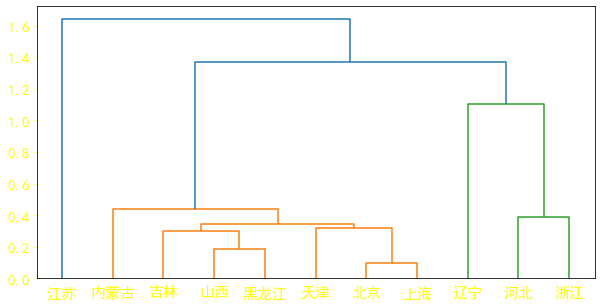

In [28]:
'''系统聚类图'''
fig, ax = plt.subplots(figsize=(10,5))
p = sch.dendrogram(H1,labels=X12.index)
ax.tick_params('both',colors='yellow',labelsize=15,labelcolor='yellow')

In [29]:
'''聚类划分'''
pd.DataFrame(sch.cut_tree(H1,n_clusters=4),index=X12.index)

,0
地区,
北京,0
天津,0
河北,1
山西,0
内蒙古,0
辽宁,2
吉林,0
黑龙江,0
上海,0


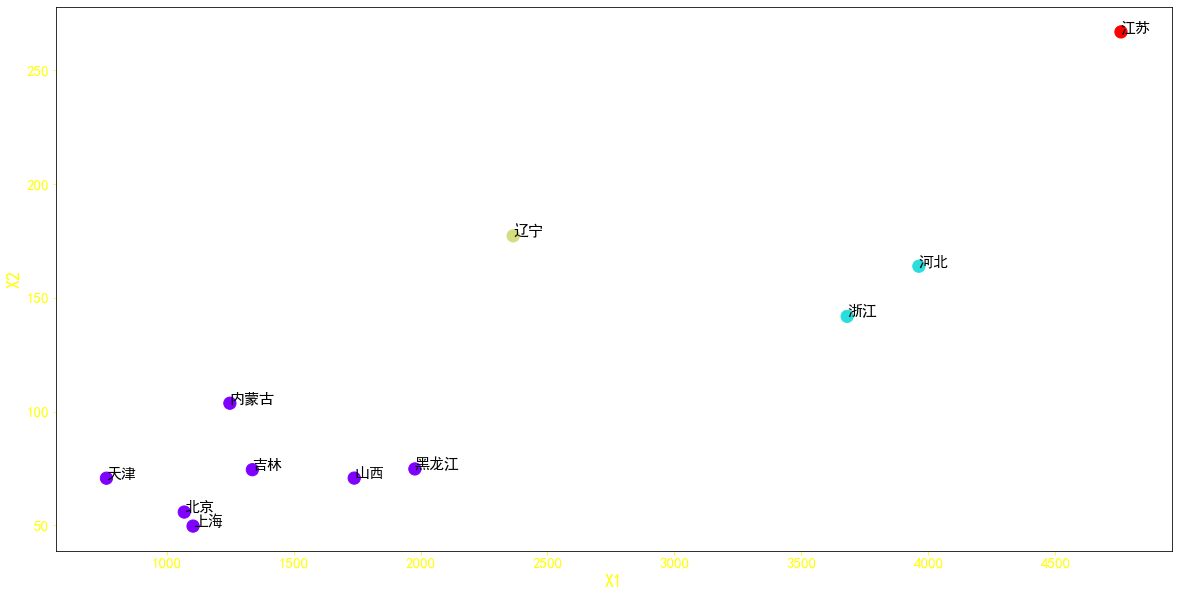

In [30]:
'''层次聚类结果图'''
import numpy as np
h1_labs = sch.cut_tree(H1,n_clusters=4)
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(X12.iloc[:,0], X12.iloc[:, 1], c=np.ravel(h1_labs),cmap=plt.cm.rainbow,marker='o',s=150)

for i in range(len(X12)):
    ax.text(X12.iloc[i,0],X12.iloc[i,1],X12.index[i],size=15)

ax.set_xlabel('X1',color='yellow',size=18)
ax.set_ylabel('X2',color='yellow',size=18)
ax.tick_params('both',colors='yellow',labelsize=15,labelcolor='yellow')

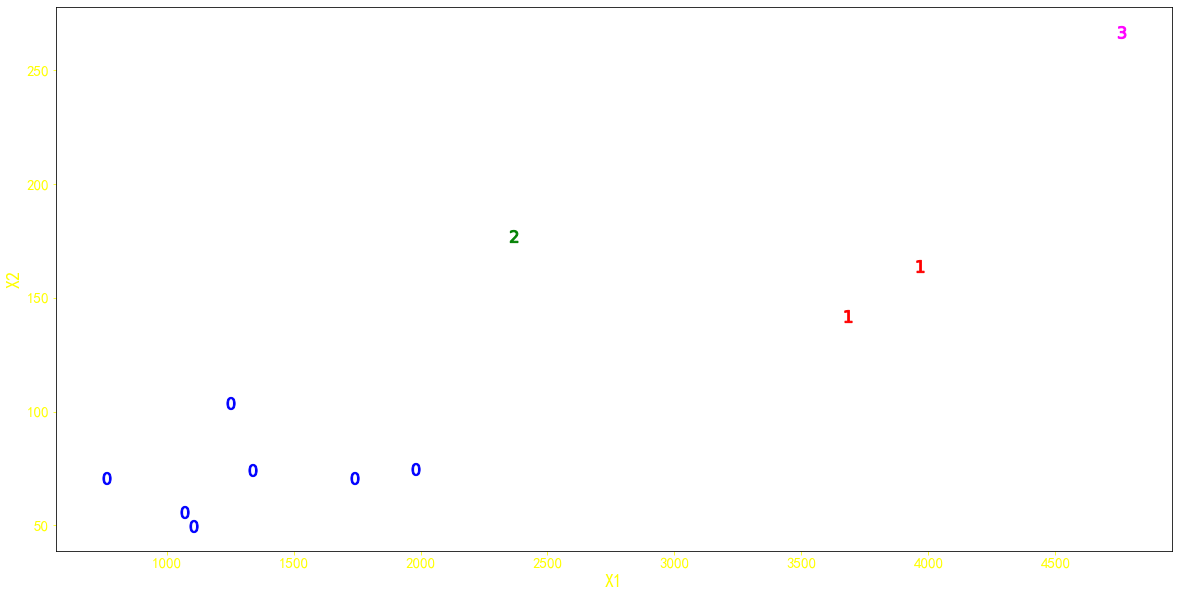

In [31]:
'''层次聚类结果数字编号图'''
import numpy as np
h1_labs = sch.cut_tree(H1,n_clusters=4)
fig, ax = plt.subplots(figsize=(20,10))
clus_labs = np.ravel(h1_labs)

cvec = ['blue','red','green','magenta']
for i in range(4):
    ax.scatter(X12.iloc[clus_labs==i,0], X12.iloc[clus_labs==i, 1], c=cvec[i],marker=f"${i}$",s=150)

ax.set_xlabel('X1',color='yellow',size=18)
ax.set_ylabel('X2',color='yellow',size=18)
ax.tick_params('both',colors='yellow',labelsize=15,labelcolor='yellow')

更多参考：https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage.html

,0
地区,
北京,0
天津,0
河北,1
山西,0
内蒙古,0
辽宁,2
吉林,0
黑龙江,0
上海,0


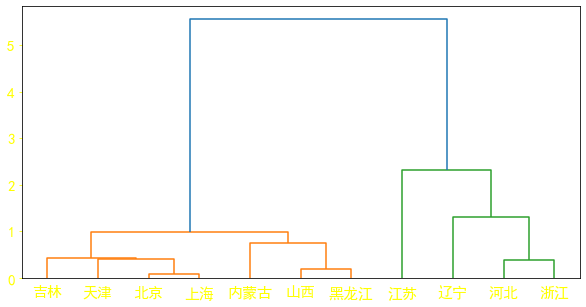

In [32]:
fig, ax2 = plt.subplots(figsize=(10,5))
H2=sch.linkage(D12,method='ward')
H2
p2 = sch.dendrogram(H2,labels=X12.index)
ax2.tick_params('both',colors='yellow',labelsize=15,labelcolor='yellow')
pd.DataFrame(sch.cut_tree(H2,n_clusters=4),index=X12.index)

In [33]:
'''列：逐步聚合的过程'''
pd.DataFrame(sch.cut_tree(H2),index= X12.index)

,0,1,2,3,4,5,6,7,8,9,10
地区,,,,,,,,,,,
北京,0,0,0,0,0,0,0,0,0,0,0
天津,1,1,1,1,0,0,0,0,0,0,0
河北,2,2,2,2,1,1,1,1,1,1,0
山西,3,3,3,3,2,2,2,0,0,0,0
内蒙古,4,4,4,4,3,3,2,0,0,0,0
辽宁,5,5,5,5,4,4,3,2,1,1,0
吉林,6,6,6,6,5,0,0,0,0,0,0
黑龙江,7,7,3,3,2,2,2,0,0,0,0
上海,8,0,0,0,0,0,0,0,0,0,0


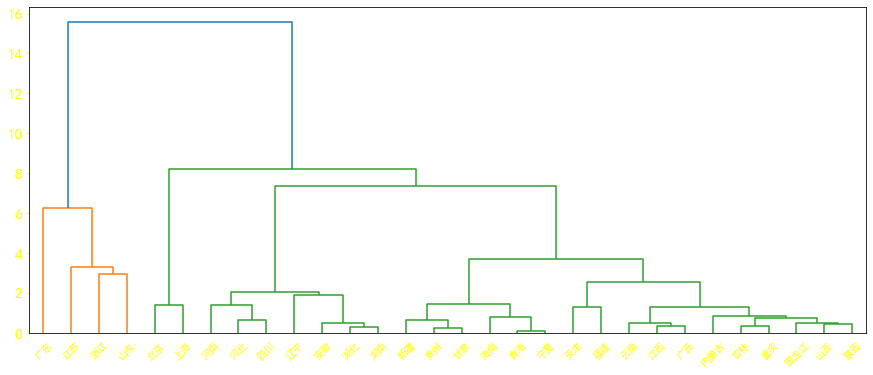

In [34]:
'''练习：依据所有地区的所有特征数据，进行层次聚类，画出层次聚类树和聚类过程，分析结果'''
Z_full=(YXdata-YXdata.mean())/YXdata.std()
D_full=sch.distance.pdist(Z_full)
D_full

H_full=sch.linkage(D_full,method='ward')
plt.figure(figsize=(15,6))
plt.tick_params('both',colors='yellow',labelsize=15,labelcolor='yellow')
pfull = sch.dendrogram(H_full,labels=YXdata.index)

In [35]:
'''列：逐步聚合的过程'''
pd.DataFrame(sch.cut_tree(H_full),index=YXdata.index)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
地区,,,,,,,,,,,,,,,,,,,,,
北京,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
天津,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
河北,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,0,0
山西,3,3,3,3,3,3,3,3,3,3,...,3,3,1,1,1,1,1,1,0,0
内蒙古,4,4,4,4,4,4,4,4,4,4,...,3,3,1,1,1,1,1,1,0,0
辽宁,5,5,5,5,5,5,5,5,5,5,...,4,2,2,2,2,2,2,1,0,0
吉林,6,6,6,6,6,6,6,6,6,6,...,3,3,1,1,1,1,1,1,0,0
黑龙江,7,7,7,7,7,7,7,3,3,3,...,3,3,1,1,1,1,1,1,0,0
上海,8,8,8,8,8,8,8,7,7,7,...,0,0,0,0,0,0,0,0,0,0


In [36]:
'''聚合最后五层'''
pd.DataFrame(sch.cut_tree(H_full),index=YXdata.index).iloc[:,-5:]

,25,26,27,28,29
地区,,,,,
北京,0,0,0,0,0
天津,1,1,1,0,0
河北,2,2,1,0,0
山西,1,1,1,0,0
内蒙古,1,1,1,0,0
辽宁,2,2,1,0,0
吉林,1,1,1,0,0
黑龙江,1,1,1,0,0
上海,0,0,0,0,0


In [37]:
'''显示4个聚类'''
pd.DataFrame(sch.cut_tree(H_full,n_clusters=4),index=YXdata.index)

,0
地区,
北京,0
天津,1
河北,2
山西,1
内蒙古,1
辽宁,2
吉林,1
黑龙江,1
上海,0


# 三、DBSCAN密度聚类分析实现

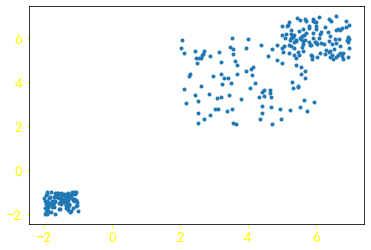

In [38]:
np.random.seed(44)
dat2D= np.array(np.random.ranf((100,2))*2+5)
dat2D= np.append(dat2D,np.random.ranf((100,2))*4+2,axis=0)
dat2D= np.append(dat2D,np.random.ranf((100,2))*1-2,axis=0)
plt.plot(dat2D[:,0],dat2D[:,1],".")
plt.tick_params('both',colors='yellow',labelsize=15,labelcolor='yellow')

In [39]:
from sklearn.cluster import DBSCAN
'''eps：ϵ-邻域的距离阈值，和样本距离超过ϵ的样本点不在ϵ-邻域内，默认0.5
min_samples：样本点要成为核心对象所需要的ϵ-邻域的样本数阈值，默认5'''
dbscan = DBSCAN(eps=1,min_samples=10)
dn2d = dbscan.fit(dat2D)
dn2d.labels_#-1为noise

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

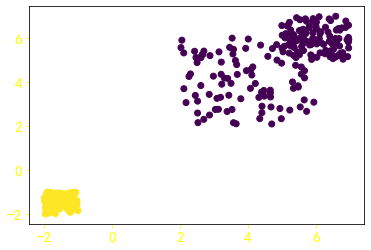

In [40]:
plt.scatter(dat2D[:,0],dat2D[:,1],c=dn2d.labels_+1)
plt.tick_params('both',colors='yellow',labelsize=15,labelcolor='yellow')

In [41]:
'''另一个例子'''
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

'''生成样本数据'''
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

X = StandardScaler().fit_transform(X)
X

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

In [42]:
'''DBSCAN聚类'''
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_
labels

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  2,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2,  0,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2

In [43]:
'''生成核心点标记数组
zeros_like: return an array of zeros with same shape as given'''
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [44]:
'''簇数目统计，忽略噪音点 -1'''
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [45]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


In [46]:
'''画出DBSCAN聚类结果图'''
import matplotlib.pyplot as plt
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
colors

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

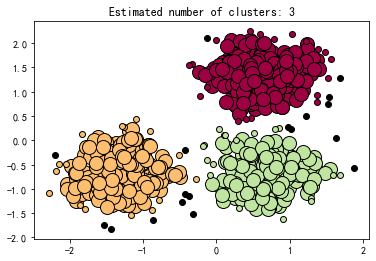

In [47]:
for k, col in zip(unique_labels, colors):#将多个可迭代对象组合起来
    if k == -1:
        '''黑色为噪音点'''
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    '''画出簇编号为 k 的核心点'''
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=14)

    '''画出簇编号为 k 的非核心点（或噪音点）'''
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# 7. 聚类分析性能比较

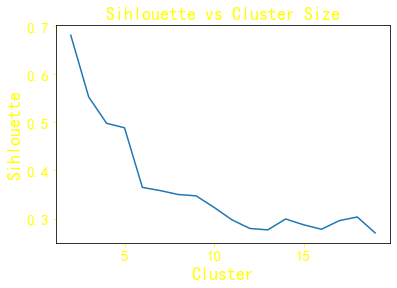

In [48]:
'''Silhouette 系数,系数越高越好'''
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
dataset = datasets.load_iris()
X = dataset.data
#print(X)
y = dataset.target
#print(y)

s = []
k = range(2,20)
for i in k:
    '''‘k-means++’ 用一种特殊的方法选定初始质心从而能加速迭代过程的收敛'''
    kmeans_model = KMeans(n_clusters=i, init="k-means++").fit(X)
    labels = kmeans_model.labels_
    s.append(metrics.silhouette_score(X, labels, metric='euclidean'))

plt.plot(k,s)
plt.ylabel("Sihlouette",color='yellow',size=18)
plt.xlabel("Cluster",color='yellow',size=18)
plt.title("Sihlouette vs Cluster Size",color='yellow',size=18)
plt.tick_params('both',colors='yellow',labelsize=15,labelcolor='yellow')

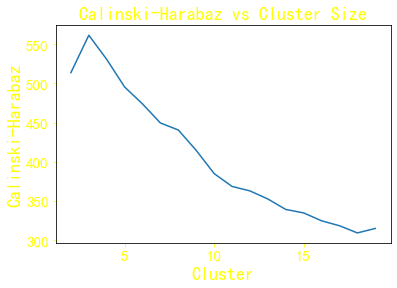

In [149]:
''' Calinski-Harabaz 指数，分数越高越好'''
s = []
k = range(2,20)
for i in k:
    '''‘k-means++’ 用一种特殊的方法选定初始质心从而能加速迭代过程的收敛'''
    kmeans_model = KMeans(n_clusters=i, init="k-means++").fit(X)
    labels = kmeans_model.labels_
    s.append(metrics.calinski_harabasz_score(X, labels))

plt.plot(k,s)
plt.ylabel("Calinski-Harabaz",color='yellow',size=18)
plt.xlabel("Cluster",color='yellow',size=18)
plt.title("Calinski-Harabaz vs Cluster Size",color='yellow',size=18)
plt.tick_params('both',colors='yellow',labelsize=15,labelcolor='yellow')

更多参考：
https://cloud.tencent.com/developer/article/1020155

BIRCH层次划分
https://blog.csdn.net/qq_40587575/article/details/82694170